<a href="https://colab.research.google.com/github/dhruv-bvpdev/Medical-Cost-Prediction/blob/main/Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
path = "/gdrive/MyDrive/deeplearning/"

In [4]:
data = pd.read_csv(path + "insurance.csv")

# DATA EXPLORATION

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.shape

(1338, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# DATA VISUALIZATION

<Figure size 600x600 with 0 Axes>

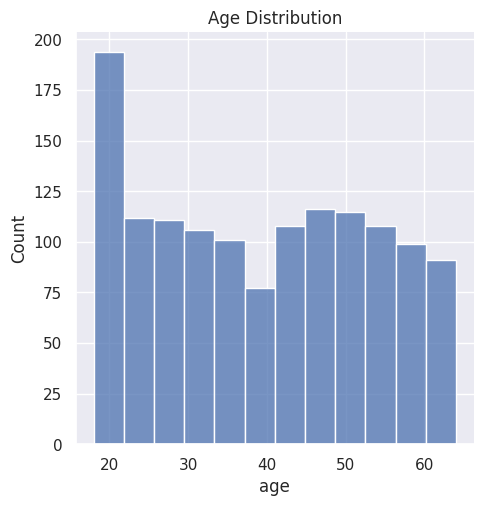

In [10]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(data['age'])
plt.title('Age Distribution')
plt.show()

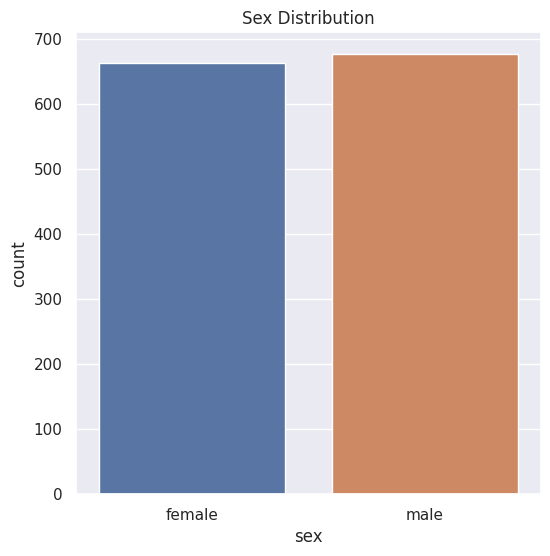

In [11]:
# Count Plot for Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.show()

<Figure size 600x600 with 0 Axes>

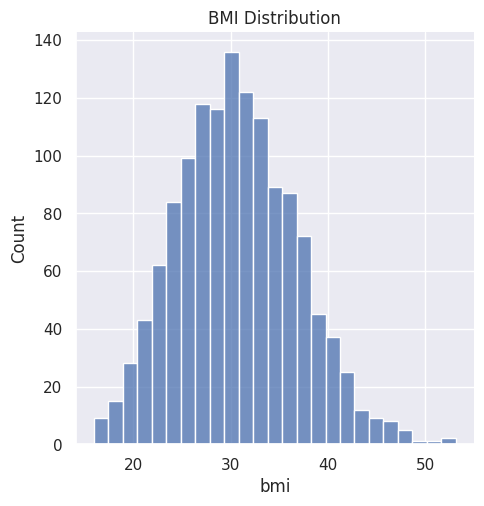

In [12]:
# Distribution of BMI value
plt.figure(figsize=(6,6))
sns.displot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

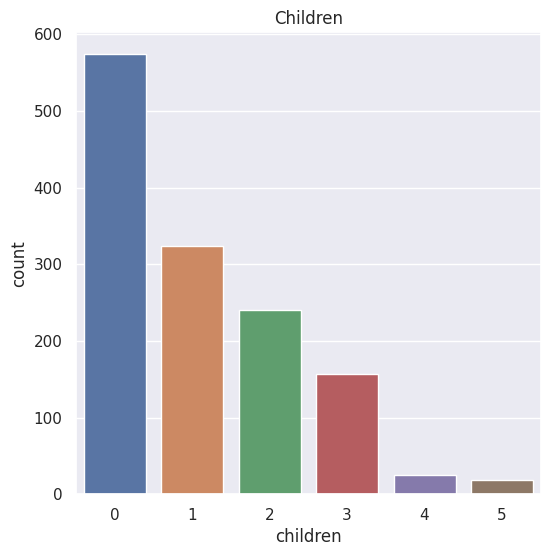

In [13]:
# Count Plot for Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children')
plt.show()

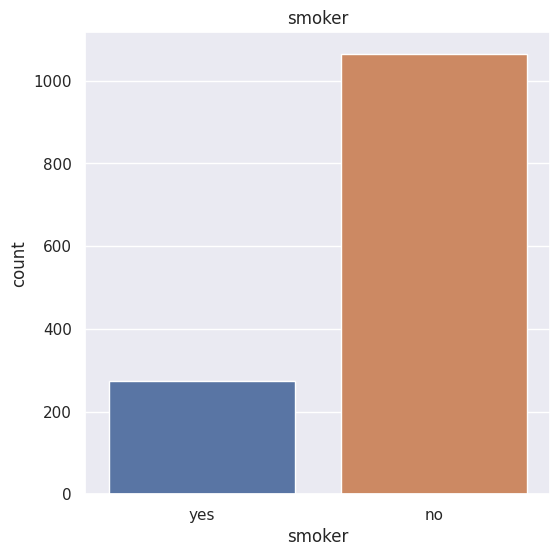

In [14]:
# Count Plot for Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('smoker')
plt.show()

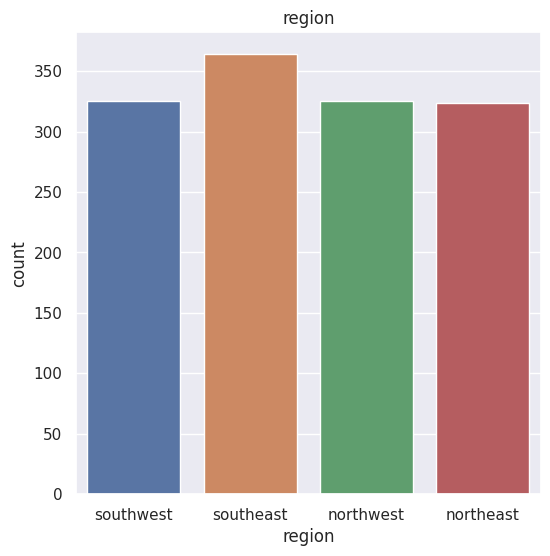

In [15]:
# Count Plot for Region Column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data)
plt.title('region')
plt.show()

<Figure size 600x600 with 0 Axes>

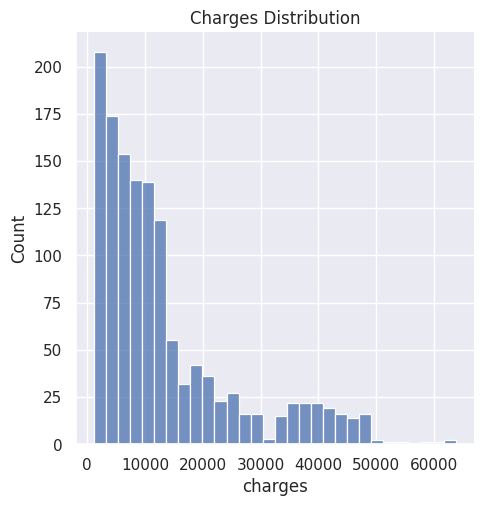

In [16]:
# Distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(data['charges'])
plt.title('Charges Distribution')
plt.show()

# DATA PRE-PROCESSING

In [17]:
# Encoding the categorical columns
data.replace({'sex':{'male':0,'female':1}}, inplace=True)
data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

# MODEL BUILDING

In [18]:
X = data.drop(columns='charges', axis=1)
Y = data['charges']

In [19]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [20]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [23]:
model = keras.Sequential()

In [24]:
model.add( tf.keras.layers.Input(shape = (6,) ))

In [25]:
model.add(tf.keras.layers.Dense(49, activation = 'relu'))

In [26]:
model.add(tf.keras.layers.Dense(63, activation = 'relu'))
# model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [27]:
model.add(tf.keras.layers.Dense(56, activation = 'relu'))
# model.add(tf.keras.layers.Dropout(rate = 0.5 ))

In [28]:
model.add(tf.keras.layers.Dense(28, activation = 'relu'))

In [29]:
model.add(tf.keras.layers.Dense(14, activation = 'relu'))

In [30]:
model.add(tf.keras.layers.Dense(1))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 49)                343       
                                                                 
 dense_1 (Dense)             (None, 63)                3150      
                                                                 
 dense_2 (Dense)             (None, 56)                3584      
                                                                 
 dense_3 (Dense)             (None, 28)                1596      
                                                                 
 dense_4 (Dense)             (None, 14)                406       
                                                                 
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
Total params: 9,094
Trainable params: 9,094
Non-trainabl

In [32]:
model.compile(
    optimizer = 'adam',
    loss = 'mae',
    metrics = ['mae']
)

In [33]:
history = model.fit(X_train, Y_train, epochs=150, validation_data = (X_test, Y_test))

Epoch 1/150
34/34 [==============================] - 2s 11ms/step - loss: 13358.1387 - mae: 13358.1387 - val_loss: 12793.1260 - val_mae: 12793.1260
Epoch 2/150
34/34 [==============================] - 0s 4ms/step - loss: 13069.5537 - mae: 13069.5537 - val_loss: 11924.5312 - val_mae: 11924.5312
Epoch 3/150
34/34 [==============================] - 0s 4ms/step - loss: 10181.1924 - mae: 10181.1924 - val_loss: 7679.5747 - val_mae: 7679.5747
Epoch 4/150
34/34 [==============================] - 0s 3ms/step - loss: 7674.9326 - mae: 7674.9326 - val_loss: 7605.1509 - val_mae: 7605.1509
Epoch 5/150
34/34 [==============================] - 0s 4ms/step - loss: 7559.5864 - mae: 7559.5864 - val_loss: 7468.5215 - val_mae: 7468.5215
Epoch 6/150
34/34 [==============================] - 0s 3ms/step - loss: 7431.4272 - mae: 7431.4272 - val_loss: 7369.2539 - val_mae: 7369.2539
Epoch 7/150
34/34 [==============================] - 0s 4ms/step - loss: 7351.4053 - mae: 7351.4053 - val_loss: 7263.7456 - val_mae

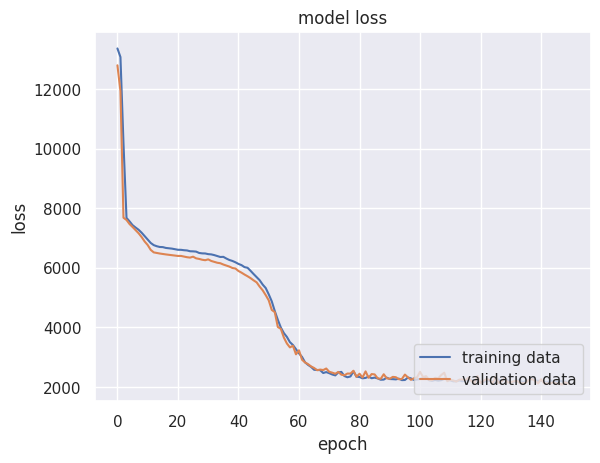

In [34]:
# Visulaizing Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [35]:
Y_pred = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [36]:
print(Y_pred.shape)
print(Y_pred[0])

(268, 1)
[2215.9253]


# BUILDING THE PREDICTIVE SYSTEM

In [37]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

1/1 [==============================] - 0s 84ms/step
[[3910.824]]
The insurance cost is USD  [3910.824]
